In [1]:
import os
import csv
from PIL import Image
import colorsys
import numpy as np
from tqdm import tqdm

# 이미지의 픽셀값을 분석하여 색상 분포를 얻습니다.
def analyze_colors(image_array):

    color_counters = {
        "Dark": 0, "Mid": 0, "Bright": 0,
        "Warm": 0, "Cool": 0,
        "Red": 0, "Orange": 0, "Gold": 0, "Yellow": 0,
        "Lime": 0, "Green": 0, "Mint": 0, "Turquoise": 0,
        "SeaBlue": 0, "Sky": 0, "Blue": 0, "Purple": 0, "Pink": 0
    }

    # Analyze each pixel's color
    for row in image_array:
        for pixel in row:
            r, g, b = pixel
            h, s, v = colorsys.rgb_to_hsv(r/255.0, g/255.0, b/255.0)

            # Brightness classification
            if v <= 0.3:
                color_counters["Dark"] += 1
            elif v >= 0.7:
                color_counters["Bright"] += 1
            else:
                color_counters["Mid"] += 1

            
            if (h <= 30/360 or h >= 330/360) or (h >= 30/360 and h <= 90/360):
                color_counters["Warm"] += 1
            else:
                color_counters["Cool"] += 1

            # Color classification
            if 338/360 <= h or h <= 18/360:
                color_counters["Red"] += 1
            elif 19/360 <= h <= 38/360:
                color_counters["Orange"] += 1
            elif 39/360 <= h <= 50/360:
                color_counters["Gold"] += 1
            elif 51/360 <= h <= 66/360:
                color_counters["Yellow"] += 1
            elif 67/360 <= h <= 82/360:
                color_counters["Lime"] += 1
            elif 83/360 <= h <= 150/360:
                color_counters["Green"] += 1
            elif 151/360 <= h <= 165/360:
                color_counters["Mint"] += 1
            elif 166/360 <= h <= 179/360:
                color_counters["Turquoise"] += 1
            elif 180/360 <= h <= 191/360:
                color_counters["SeaBlue"] += 1
            elif 192/360 <= h <= 199/360:
                color_counters["Sky"] += 1
            elif 200/360 <= h <= 260/360:
                color_counters["Blue"] += 1
            elif 261/360 <= h <= 304/360:
                color_counters["Purple"] += 1
            elif 305/360 <= h <= 337/360:
                color_counters["Pink"] += 1
            
    total_pixels = image_array.shape[0] * image_array.shape[1]
    color_ratios = {k: v / total_pixels for k, v in color_counters.items()}

    return color_ratios


# 이미지 분석을 위한 함수
def analyze_image(image_path):
    # 이미지를 불러와서 RGB로 변환합니다.
    image = Image.open(image_path)
    image = image.convert("RGB")

    # 이미지를 numpy array로 변환합니다.
    image_array = np.array(image)

    # 색상 분석 로직
    return analyze_colors(image_array)

# 디렉토리의 이미지들을 분석하고 결과를 CSV로 저장하는 함수
def analyze_directory_to_csv(directory_path, csv_file_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    files = [f for f in os.listdir(directory_path) if any(f.lower().endswith(ext) for ext in image_extensions)]

    with open(csv_file_path, 'w', newline='') as csvfile:
        fieldnames = [
            'Filename', "Warm", "Cool",
            "Bright", "Mid", "Dark",
            "Red", "Orange", "Gold", "Yellow", "Lime", "Green", "Mint", "Turquoise", "SeaBlue", "Sky", "Blue", "Purple", "Pink"
        ]
        
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for filename in tqdm(files, desc="Analyzing images"):
            image_path = os.path.join(directory_path, filename)
            color_ratios = analyze_image(image_path)
            
            # CSV 파일에 결과를 기록하기 위해 새로운 row 생성
            row = {
            'Filename': filename,
            'Warm': color_ratios['Warm'],
            'Cool': color_ratios['Cool'],
            'Bright': color_ratios['Bright'],
            'Mid': color_ratios['Mid'],
            'Dark': color_ratios['Dark'],
            'Red': color_ratios['Red'],
            'Orange': color_ratios['Orange'],
            'Gold': color_ratios['Gold'],
            'Yellow': color_ratios['Yellow'],
            'Lime': color_ratios['Lime'],
            'Green': color_ratios['Green'],
            'Mint': color_ratios['Mint'],
            'Turquoise': color_ratios['Turquoise'],
            'SeaBlue': color_ratios['SeaBlue'],
            'Sky': color_ratios['Sky'],
            'Blue': color_ratios['Blue'],
            'Purple': color_ratios['Purple'],
            'Pink': color_ratios['Pink']
            }

            writer.writerow(row)


# 이미지 분석을 실행하고 CSV 파일로 결과를 저장
directory_path = 'data\ImgData9000'  # 이미지가 저장된 디렉토리 경로
csv_file_path = 'analysis_results.csv'  # 결과를 저장할 CSV 파일 경로
analyze_directory_to_csv(directory_path, csv_file_path)


Analyzing images: 100%|██████████| 133/133 [08:07<00:00,  3.66s/it]


In [ ]:
# 질감추출
from skimage import feature, io, color
import numpy as np
import matplotlib.pyplot as plt

image = io.imread('imgData100/abstract (35).jpg')
gray_image = color.rgb2gray(image)

gray_image = (gray_image * 255).astype(np.uint8)

glcm = feature.greycomatrix(gray_image, [1], [0], 256, symmetric=True, normed=True)

contrast = feature.greycoprops(glcm, 'contrast')[0, 0]
dissimilarity = feature.greycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = feature.greycoprops(glcm, 'homogeneity')[0, 0]
ASM = feature.greycoprops(glcm, 'ASM')[0, 0]
energy = feature.greycoprops(glcm, 'energy')[0, 0]
correlation = feature.greycoprops(glcm, 'correlation')[0, 0]

print(f'Contrast: {contrast}')
print(f'Dissimilarity: {dissimilarity}')
print(f'Homogeneity: {homogeneity}')
print(f'ASM: {ASM}')
print(f'Energy: {energy}')
print(f'Correlation: {correlation}')


Contrast: 22.782381360078276
Dissimilarity: 1.32492967221135
Homogeneity: 0.7261635650491414
ASM: 0.01352606717018882
Energy: 0.11630162152863055
Correlation: 0.9939044749630456


c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.grayco

대비(Contrast): 이미지에서 밝은 부분과 어두운 부분 간의 대비를 측정합니다. 대비 값이 높으면 이미지에 밝고 어두운 부분이 분명하게 구분되어 있는 것을 의미합니다.

비유사성(Dissimilarity): 한 픽셀과 그 이웃 픽셀 간의 차이를 측정합니다. 비유사성이 낮으면 이미지의 질감이 비교적 일정하다는 것을, 높으면 질감에 변화가 많다는 것을 의미합니다.

균질성(Homogeneity): 이미지에서 비슷한 밝기의 픽셀이 얼마나 자주 등장하는지를 측정합니다. 균질성이 높으면 비슷한 밝기의 픽셀들이 많이 붙어있다는 것을 의미하며, 질감이 매우 균일하다는 것을 나타냅니다.

ASM(Angular Second Moment): 이미지에서 특정 질감이 얼마나 자주 반복되는지를 측정합니다. 값이 높으면 질감이 매우 일정하다는 것을 의미합니다.

에너지(Energy): 질감의 균일성을 측정합니다. 에너지 값이 높을수록 이미지의 질감이 일정하다는 것을 나타냅니다.

상관관계(Correlation): 이미지 내의 픽셀 값들이 서로 얼마나 잘 관련되어 있는지를 측정합니다. 값이 1에 가까우면 픽셀 값들 사이에 강한 상관관계가 있다는 것을 의미하며, 이는 질감의 방향성이 일정하거나 패턴이 반복되고 있다는 것을 나타냅니다.

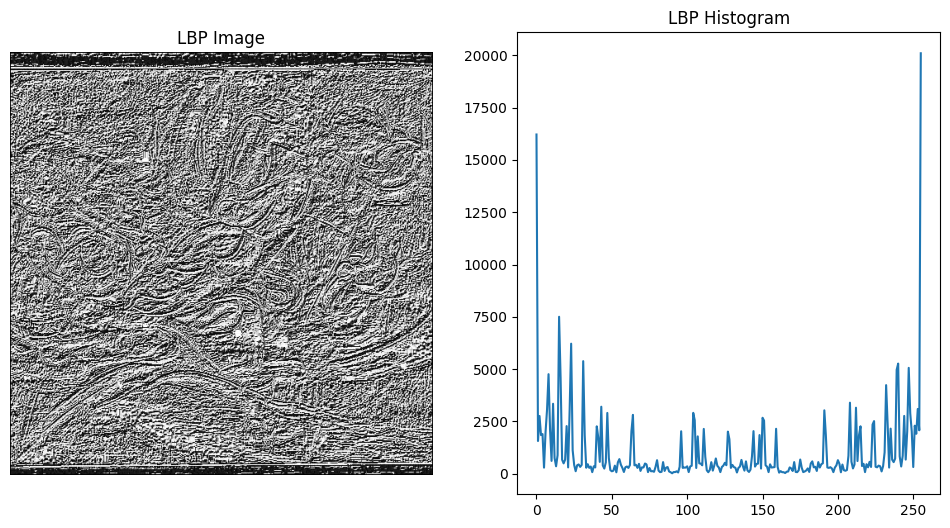

In [ ]:
# 이미지패턴분석
import cv2
import numpy as np
from matplotlib import pyplot as plt

def compute_lbp(image_path):
    # 이미지를 그레이 스케일로 읽어오기
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    ㅌ
    # LBP 연산
    lbp = np.zeros_like(image)
    neighs = [(i, j) for i in range(-1, 2) for j in range(-1, 2) if (i, j) != (0, 0)]
    for y in range(1, image.shape[0] - 1):
        for x in range(1, image.shape[1] - 1):
            binary_string = ''
            for dy, dx in neighs:
                binary_string += '1' if image[y+dy, x+dx] >= image[y, x] else '0'
            lbp[y, x] = int(binary_string, 2)
    
    # LBP 히스토그램 계산
    lbp_hist = cv2.calcHist([lbp], [0], None, [256], [0, 256])
    return lbp, lbp_hist

def plot_lbp(lbp, lbp_hist):
    # LBP 이미지 표시
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(lbp, cmap='gray')
    plt.title('LBP Image')
    plt.axis('off')

    # LBP 히스토그램 표시
    plt.subplot(1, 2, 2)
    plt.plot(lbp_hist)
    plt.title('LBP Histogram')
    plt.show()

# 사용 예시
if __name__ == "__main__":
    image_path = 'imgData100/abstract (81).jpg'  # 이미지 파일 경로
    lbp, lbp_hist = compute_lbp(image_path)
    plot_lbp(lbp, lbp_hist)


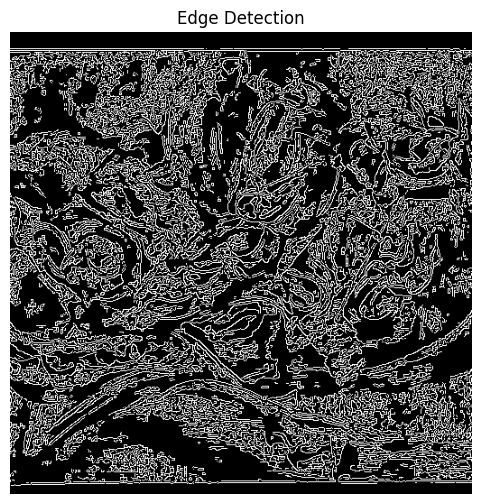

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = 'imgData100/abstract (81).jpg'

# 이미지를 흑백으로 불러옵니다.
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 형태: Canny 엣지 검출기를 사용하여 엣지 추출
edges = cv2.Canny(image, 100, 200)

# 엣지 결과 시각화
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')  # 축을 숨깁니다.
plt.show()


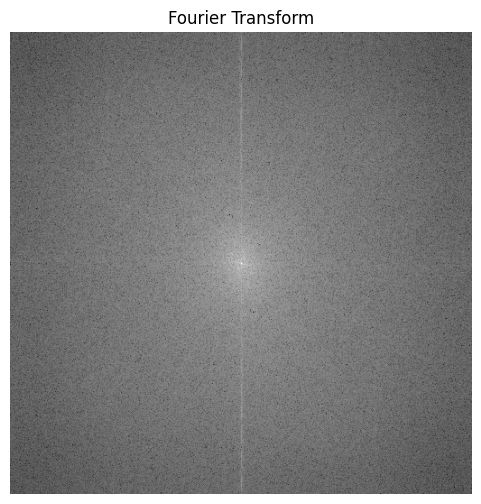

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = 'imgData100/abstract (81).jpg'

# 이미지를 흑백으로 불러옵니다.
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 질감: 푸리에 변환을 적용하여 공간 빈도 특성 추출
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

# 푸리에 변환 결과 시각화
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')  # 축을 숨깁니다.
plt.show()


((512, 512, 3), 'RGB', (512, 512), (512, 512, 3))